# 6.1 Sourcing Open Data

### This script contains the following:
1. Import libraries
2. Import data set
3. Data cleaning 
4. Export dataframe as Pkl

## 1. Import libraries

In [5363]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
# Import library that handles warnings --added only after completing all notebooks 
import warnings # This is a library that handles warnings.
warnings.filterwarnings("ignore")

## 2. Import data set

In [5364]:
# Define path
path = r'/Users/rose/Documents/My Tableau Repository/Advance Analytics & Dashboard Design'

# Import data using the path variable 'path' as defined above
df_listings = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'listings.csv'), index_col = False)

In [5365]:
# Print the dataframe's information (no of rows, columns, column names, dtype and count)
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            13725 non-null  int64  
 1   listing_url                                   13725 non-null  object 
 2   scrape_id                                     13725 non-null  int64  
 3   last_scraped                                  13725 non-null  object 
 4   source                                        13725 non-null  object 
 5   name                                          13725 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         9072 non-null   object 
 8   picture_url                                   13725 non-null  object 
 9   host_id                                       13725 non-null 

##### Keep only relevant columns

In [5366]:
# Keep only relevant columns 
vars_to_keep = ['id', 'host_id', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'beds', 'price', 'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'instant_bookable']

This research involves exploration of each factor (pricing, location, features, and host reputation) to determine their relative importance in the decision-making process of short-term-rental-seeking travelers.

In [5367]:
# Import data set with columns in the vars_to_keep; from this point, working with df_listings dataframe
df_listings = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'listings.csv'), usecols = vars_to_keep)

In [5368]:
# Inspect content of dataframe, added ('display.max_columns', None) to display all columns without truncation
pd.set_option('display.max_columns', None)
df_listings.head(1)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,beds,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
0,197677,964081,within a day,100%,t,t,Sumida Ku,35.71707,139.82608,Entire home/apt,2,2.0,"$12,000.00",3,174,4.77,f


In [5369]:
# Print updated info  
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      13725 non-null  int64  
 1   host_id                 13725 non-null  int64  
 2   host_response_time      13203 non-null  object 
 3   host_response_rate      13203 non-null  object 
 4   host_is_superhost       13543 non-null  object 
 5   host_identity_verified  13725 non-null  object 
 6   neighbourhood_cleansed  13725 non-null  object 
 7   latitude                13725 non-null  float64
 8   longitude               13725 non-null  float64
 9   room_type               13725 non-null  object 
 10  accommodates            13725 non-null  int64  
 11  beds                    13067 non-null  float64
 12  price                   13312 non-null  object 
 13  minimum_nights          13725 non-null  int64  
 14  number_of_reviews       13725 non-null

The info() above helps in gauging data completeness and serves as initial check for missing values. It also provides useful information such as data types of each columns and memory usage. 

## 3. Data Cleaning

### Renaming column

In [5370]:
# Renaming a column
df_listings.rename(columns = {'neighbourhood_cleansed' : 'neighbourhood'}, inplace = True)
# Verify change
df_listings.head(2)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood,latitude,longitude,room_type,accommodates,beds,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
0,197677,964081,within a day,100%,t,t,Sumida Ku,35.71707,139.82608,Entire home/apt,2,2.0,"$12,000.00",3,174,4.77,f
1,776070,801494,within an hour,100%,t,t,Kita Ku,35.73844,139.76917,Private room,1,1.0,"$8,541.00",3,249,4.98,f


#### Find missing avlues

In [5371]:
# Find missing values
df_listings.isnull().sum()

id                           0
host_id                      0
host_response_time         522
host_response_rate         522
host_is_superhost          182
host_identity_verified       0
neighbourhood                0
latitude                     0
longitude                    0
room_type                    0
accommodates                 0
beds                       658
price                      413
minimum_nights               0
number_of_reviews            0
review_scores_rating      1633
instant_bookable             0
dtype: int64

### Address missing values

#### 01. Address missing values for 'host_response_time'

In [5372]:
# Compute for mode
mode_value_response_time = df_listings['host_response_time'].mode()[0]

In [5373]:
mode_value_response_time

'within an hour'

In [5374]:
# Fill missing value in the 'host_is_superhost' column with mode value
df_listings['host_response_time'].fillna(mode_value_response_time, inplace=True)

In [5375]:
mode_value_response_time

'within an hour'

#### 02. Special handling for 'host_response_rate': 1) change data type; 2) Address missing values 

In [5376]:
# Pre-processing: Remove non-numeric characters from 'price' column
df_listings['host_response_rate'] = df_listings['host_response_rate'].replace('[\$,]', '', regex=True)

In [5377]:
df_listings['host_response_rate'] = df_listings['host_response_rate'].replace('[\%,]', '', regex=True).astype(float) 

In [5378]:
df_listings.describe().round(2)

,id,host_id,host_response_rate,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating
count,1.372500e+04,1.372500e+04,13203.00,13725.00,13725.00,13725.00,13067.00,13725.00,13725.00,12092.00
mean,4.359072e+17,2.641385e+08,99.15,35.70,139.74,4.28,2.61,2.85,36.75,4.68
std,4.571490e+17,1.709323e+08,5.24,0.04,0.07,2.95,2.24,11.46,61.40,0.35
min,1.976770e+05,3.222340e+05,0.00,35.52,139.08,1.00,1.00,1.00,0.00,1.00
25%,3.836264e+07,1.103797e+08,100.00,35.69,139.70,2.00,1.00,1.00,3.00,4.57
50%,5.343198e+07,2.446769e+08,100.00,35.70,139.73,3.00,2.00,1.00,15.00,4.76
75%,9.206494e+17,4.112084e+08,100.00,35.72,139.79,6.00,3.00,2.00,45.00,4.91
max,1.054951e+18,5.526766e+08,100.00,35.83,139.91,16.00,60.00,1000.00,2258.00,5.00


In [5379]:
# Calculate the median value of the 'beds' column
median_value_response_rate = df_listings['host_response_rate'].median()

In [5380]:
median_value_response_rate

100.0

In [5381]:
# Fill missing value in the 'price' column with median value
df_listings['host_response_rate'].fillna(median_value_response_rate, inplace=True)

#### 03. Address missing values for 'host_is_superhost'

In [5382]:
# Compute for mode
mode_value_superhost = df_listings['host_is_superhost'].mode()[0]

In [5383]:
mode_value_superhost

'f'

In [5384]:
# Fill missing value in the 'host_is_superhost' column with mode value
df_listings['host_is_superhost'].fillna(mode_value_superhost, inplace=True)

In [5385]:
mode_value_superhost

'f'

In [5386]:
df_listings['host_is_superhost'].unique()

array(['t', 'f'], dtype=object)

#### 04. Address missing value for 'beds'

In [5387]:
# Calculate the median value of the 'beds' column
median_value_beds = df_listings['beds'].median()

In [5388]:
median_value_beds

2.0

In [5389]:
# Filter out rows extreme outliers where 'minimum_nights' is between 30 and 61 beds
df_listings = df_listings[~df_listings['beds'].between(30, 61)]

In [5390]:
# Fill missing value in the 'beds' column with the median value (chose median because of presence of outliers)
df_listings['beds'].fillna(median_value_beds, inplace=True)

#### 05. Special Handling for price: 1) change data type, 2) convert to us dollars, 3) address missing values for 'price' after 

In [5391]:
# Pre-processing: Remove non-numeric characters from 'price' column
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True)

In [5392]:
# Change data type: of 'price' column from string to floating-point numbers
df_listings['price'] = df_listings['price'].astype('float64')

In [5393]:
# Create the new column, 'price_usd' with price's US dollar equivalent--Convert 'price' to US dollar
forex = 161.72
df_listings['price_usd'] = round(df_listings['price'] / forex)

In [5394]:
# Calculate the median value of the 'beds' column
median_value_price = df_listings['price_usd'].median()

In [5395]:
median_value_price

131.0

In [5396]:
# Fill missing value in the 'price' column with median value
df_listings['price_usd'].fillna(median_value_price, inplace=True)

#### 6. Address missing values for 'review_scores_rating'

In [5397]:
# Calculate the mean value of the 'review_scores_rating' column
mean_value = df_listings['review_scores_rating'].mean()

In [5398]:
mean_value.round(2)

4.68

In [5399]:
# Fill missing values in the column with the mean value
df_listings['review_scores_rating'].fillna(mean_value, inplace=True)

### Convert data types for columns 'id' 

The 'id' variable should be treated as categorical variable rather than numerical value

In [5400]:
# Change data type of 'id' to 'str' to make categorical
df_listings['id'] = df_listings['id'].astype('str')

In [5401]:
# Check if conversion from 'int64' to 'str' was successful
df_listings.dtypes['id']

dtype('O')

In [5402]:
# Change data type of 'host_id' to 'str' to make categorical
df_listings['host_id'] = df_listings['host_id'].astype('str')

In [5403]:
# Check if conversion from 'int64' to 'str' was successful
df_listings.dtypes['host_id']

dtype('O')

In [5404]:
# Generate descriptive statistics/summary statistics for numerical columns 
df_listings.describe().round(2)

,host_response_rate,latitude,longitude,accommodates,beds,price,minimum_nights,number_of_reviews,review_scores_rating,price_usd
count,13716.00,13716.00,13716.00,13716.00,13716.00,13303.00,13716.00,13716.00,13716.00,13716.00
mean,99.19,35.70,139.74,4.28,2.56,30044.37,2.85,36.72,4.68,184.14
std,5.14,0.04,0.07,2.95,1.93,44861.47,11.46,61.26,0.33,273.37
min,0.00,35.52,139.08,1.00,1.00,1500.00,1.00,0.00,1.00,9.00
25%,100.00,35.69,139.70,2.00,1.00,13478.50,1.00,3.00,4.60,85.00
50%,100.00,35.70,139.73,3.00,2.00,21124.00,1.00,15.00,4.72,131.00
75%,100.00,35.72,139.79,6.00,3.00,35436.50,2.00,45.00,4.88,215.00
max,100.00,35.83,139.91,16.00,24.00,1421200.00,1000.00,2258.00,5.00,8788.00


In [5405]:
df_listings.head(2)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood,latitude,longitude,room_type,accommodates,beds,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price_usd
0,197677,964081,within a day,100.0,t,t,Sumida Ku,35.71707,139.82608,Entire home/apt,2,2.0,12000.0,3,174,4.77,f,74.0
1,776070,801494,within an hour,100.0,t,t,Kita Ku,35.73844,139.76917,Private room,1,1.0,8541.0,3,249,4.98,f,53.0


In [5406]:
# Find missing values
df_listings.isnull().sum()

id                          0
host_id                     0
host_response_time          0
host_response_rate          0
host_is_superhost           0
host_identity_verified      0
neighbourhood               0
latitude                    0
longitude                   0
room_type                   0
accommodates                0
beds                        0
price                     413
minimum_nights              0
number_of_reviews           0
review_scores_rating        0
instant_bookable            0
price_usd                   0
dtype: int64

### Drop 'price' column; use 'price_usd'

In [5407]:
# Assuming you want to drop a column named 'column_to_drop'
df_listings.drop(columns=['price'], inplace=True)

In [5408]:
# Find missing values
df_listings.isnull().sum()

id                        0
host_id                   0
host_response_time        0
host_response_rate        0
host_is_superhost         0
host_identity_verified    0
neighbourhood             0
latitude                  0
longitude                 0
room_type                 0
accommodates              0
beds                      0
minimum_nights            0
number_of_reviews         0
review_scores_rating      0
instant_bookable          0
price_usd                 0
dtype: int64

In [5409]:
df_listings.describe().round(2)

,host_response_rate,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,price_usd
count,13716.00,13716.00,13716.00,13716.00,13716.00,13716.00,13716.00,13716.00,13716.00
mean,99.19,35.70,139.74,4.28,2.56,2.85,36.72,4.68,184.14
std,5.14,0.04,0.07,2.95,1.93,11.46,61.26,0.33,273.37
min,0.00,35.52,139.08,1.00,1.00,1.00,0.00,1.00,9.00
25%,100.00,35.69,139.70,2.00,1.00,1.00,3.00,4.60,85.00
50%,100.00,35.70,139.73,3.00,2.00,1.00,15.00,4.72,131.00
75%,100.00,35.72,139.79,6.00,3.00,2.00,45.00,4.88,215.00
max,100.00,35.83,139.91,16.00,24.00,1000.00,2258.00,5.00,8788.00


#### Address outliers for 'price_usd'

Text(0.5, 1.0, 'Histogram of price_usd')

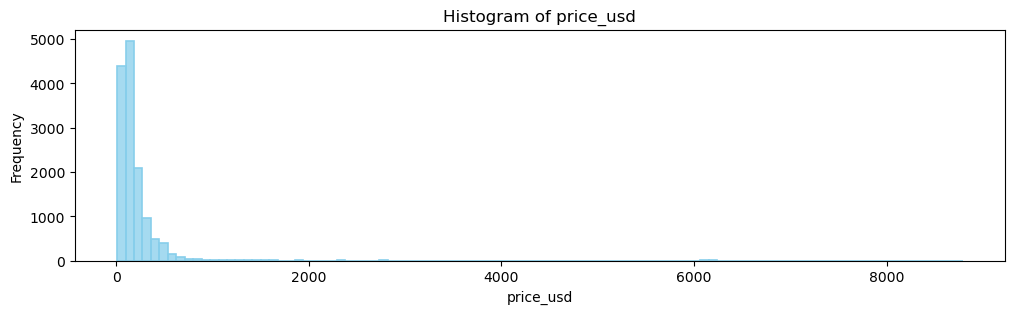

In [5410]:
# Create a histogram with seaborn
plt.figure(figsize=(12, 3))  # Adjust width and height as needed
sns.histplot(df_listings['price_usd'], bins=100, kde=False, color='skyblue', 
             edgecolor='skyblue', linewidth=1.2)
plt.xlabel('price_usd')
plt.ylabel('Frequency')
plt.title('Histogram of price_usd')

In [5411]:
print(df_listings['price_usd'].describe().round(2))

count    13716.00
mean       184.14
std        273.37
min          9.00
25%         85.00
50%        131.00
75%        215.00
max       8788.00
Name: price_usd, dtype: float64


In [5412]:
# Create a function to find outliers using IQR

def find_outliers_IQR(df_listings):
   q1=df_listings.quantile(0.25)
   q3=df_listings.quantile(0.75)
   IQR=q3-q1
   outliers = df_listings[((df_listings<(q1-1.5*IQR)) | (df_listings>(q3+1.5*IQR)))]

   return outliers

In [5413]:
# Print number of outliers, with the max and min outlier values
outliers = find_outliers_IQR(df_listings['price_usd'])

print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 973
max outlier value: 8788.0
min outlier value: 411.0


13        440.0
28        436.0
29        813.0
143       420.0
191       449.0
197       636.0
241       459.0
247       438.0
271       818.0
284       526.0
286       503.0
325       440.0
327       791.0
352       721.0
364       446.0
379       436.0
392       824.0
393       807.0
419       445.0
427       721.0
435       556.0
440       485.0
446       433.0
449      1087.0
477       819.0
509       901.0
515       420.0
626       548.0
629      6201.0
638       484.0
672       717.0
713       483.0
719       643.0
736       498.0
744       742.0
751       618.0
759       493.0
777       697.0
801       954.0
809       437.0
850       465.0
861       444.0
899       438.0
935       663.0
975       495.0
1011      442.0
1017     6184.0
1021     1237.0
1024      530.0
1066     1396.0
1126      411.0
1270      642.0
1322      424.0
1327      494.0
1336      532.0
1376      433.0
1378      631.0
1382      736.0
1383      589.0
1395      513.0
1472      449.0
1485      445.0
1508    

Text(0.5, 1.0, 'Histogram of price_usd')

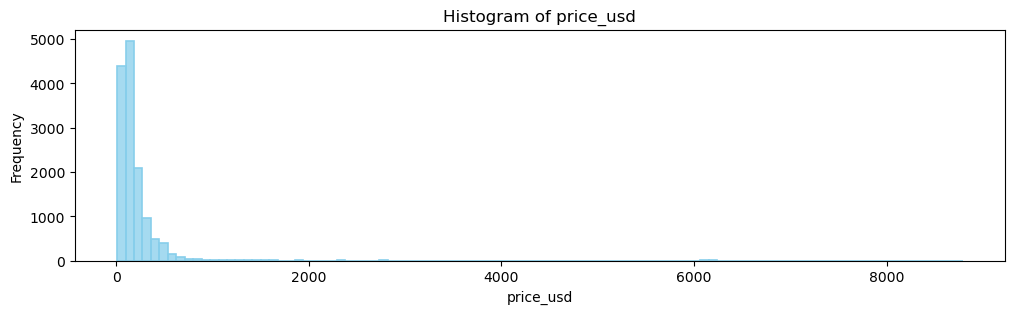

In [5414]:
# Create a histogram with seaborn
plt.figure(figsize=(12, 3))  # Adjust width and height as needed
sns.histplot(df_listings['price_usd'], bins=100, kde=False, color='skyblue', 
             edgecolor='skyblue', linewidth=1.2)
plt.xlabel('price_usd')
plt.ylabel('Frequency')
plt.title('Histogram of price_usd')

In [5415]:
# Use quartiles (IQR method) to define the range
Q1 = df_listings['price_usd'].quantile(0.25)
Q3 = df_listings['price_usd'].quantile(0.75)
IQR = Q3 - Q1

In [5416]:
# Define the lower and upper bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [5417]:
# Filter the DataFrame to remove outliers
df_listings = df_listings[(df_listings['price_usd'] >= lower_bound) & (df_listings['price_usd'] <= upper_bound)]

In [5418]:
# print(df_listings['price_usd'].describe().round(2))

In [5419]:
# df_listings.shape

In [5420]:
df_listings.describe()

,host_response_rate,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,price_usd
count,12743.000000,12743.000000,12743.000000,12743.000000,12743.000000,12743.000000,12743.000000,12743.000000,12743.000000
mean,99.226399,35.698513,139.737144,4.001569,2.411912,2.749588,36.339951,4.681550,143.986345
std,4.659862,0.041224,0.073259,2.596316,1.690707,10.787127,61.083188,0.330091,85.176664
min,0.000000,35.520880,139.095680,1.000000,1.000000,1.000000,0.000000,1.000000,9.000000
25%,100.000000,35.687705,139.701455,2.000000,1.000000,1.000000,3.000000,4.600000,81.000000
50%,100.000000,35.703930,139.730300,3.000000,2.000000,1.000000,15.000000,4.710000,126.000000
75%,100.000000,35.723013,139.790487,5.000000,3.000000,2.000000,45.000000,4.880000,189.000000
max,100.000000,35.830640,139.912548,16.000000,20.000000,1000.000000,2258.000000,5.000000,410.000000


#### Address outliers for 'minimum_nights'

In [5421]:
# Create a function to find outliers using IQR

def find_outliers_IQR(df_listings):
   q1=df_listings.quantile(0.25)
   q3=df_listings.quantile(0.75)
   IQR=q3-q1
   outliers = df_listings[((df_listings<(q1-1.5*IQR)) | (df_listings>(q3+1.5*IQR)))]

   return outliers

In [5422]:
# Print number of outliers, with the max and min outlier values
outliers = find_outliers_IQR(df_listings['minimum_nights'])

print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 988
max outlier value: 1000
min outlier value: 4


3          30
7           4
8           7
11          7
12         10
18          4
20          6
34          4
36          5
40          4
41         10
42          5
44          4
58          4
66          7
67          7
68          7
69         10
74          4
79          5
82         30
83          4
86          5
97          5
106         5
114       178
115         4
118         4
120         4
153         5
154        10
161         4
188         5
190         6
192        30
205        30
206        30
207        30
217         5
219         6
220         4
235        30
236       180
267         4
277         5
283         4
297         5
310         4
321         5
323         4
344         7
347         6
349         4
366         4
380        30
389         5
407         4
428         4
434        30
438        30
444         5
453         5
475         5
478         4
480         4
482         4
490         5
497        30
527         4
539         5
560         5
586   

In [5423]:
df_listings['minimum_nights'].value_counts(dropna = False)

minimum_nights
1       6557
2       4185
3       1013
4        263
30       245
5        198
29        64
7         58
28        42
20        21
14        19
31        17
6         16
21         8
10         8
13         5
100        4
180        3
25         3
16         3
15         3
60         3
32         2
178        1
1000       1
90         1
Name: count, dtype: int64

#### Decided not to delete all 988 outliers to avoid skewing the data. Instead, we defined extreme value for minimum nights as between 30 and 100 nights

In [5424]:
# Filter out rows extreme outliers where 'minimum_nights' is between 30 and 1000 nights
df_listings = df_listings[~df_listings['minimum_nights'].between(30, 1000)]

In [5425]:
df_listings.describe()

,host_response_rate,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,price_usd
count,12466.000000,12466.000000,12466.000000,12466.000000,12466.000000,12466.000000,12466.000000,12466.000000,12466.000000
mean,99.224852,35.698533,139.737351,3.998556,2.410476,1.982111,36.931975,4.680825,144.926600
std,4.651538,0.041251,0.073184,2.589404,1.689224,2.879879,61.485213,0.331225,85.187004
min,0.000000,35.520880,139.095680,1.000000,1.000000,1.000000,0.000000,1.000000,10.000000
25%,100.000000,35.687911,139.701594,2.000000,1.000000,1.000000,4.000000,4.600000,82.000000
50%,100.000000,35.703950,139.730834,3.000000,2.000000,1.000000,15.000000,4.720000,127.000000
75%,100.000000,35.722830,139.790505,5.000000,3.000000,2.000000,46.000000,4.880000,190.000000
max,100.000000,35.830640,139.912548,16.000000,20.000000,29.000000,2258.000000,5.000000,410.000000


In [5426]:
df_listings['minimum_nights'].value_counts(dropna = False)

minimum_nights
1     6557
2     4185
3     1013
4      263
5      198
29      64
7       58
28      42
20      21
14      19
6       16
10       8
21       8
13       5
25       3
16       3
15       3
Name: count, dtype: int64

In [5427]:
df_listings['minimum_nights'].describe().round(2)

count    12466.00
mean         1.98
std          2.88
min          1.00
25%          1.00
50%          1.00
75%          2.00
max         29.00
Name: minimum_nights, dtype: float64

In [5428]:
df_listings.shape

(12466, 17)

In [5429]:
df_listings.describe().round(2)

,host_response_rate,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,price_usd
count,12466.00,12466.00,12466.00,12466.00,12466.00,12466.00,12466.00,12466.00,12466.00
mean,99.22,35.70,139.74,4.00,2.41,1.98,36.93,4.68,144.93
std,4.65,0.04,0.07,2.59,1.69,2.88,61.49,0.33,85.19
min,0.00,35.52,139.10,1.00,1.00,1.00,0.00,1.00,10.00
25%,100.00,35.69,139.70,2.00,1.00,1.00,4.00,4.60,82.00
50%,100.00,35.70,139.73,3.00,2.00,1.00,15.00,4.72,127.00
75%,100.00,35.72,139.79,5.00,3.00,2.00,46.00,4.88,190.00
max,100.00,35.83,139.91,16.00,20.00,29.00,2258.00,5.00,410.00


#### Address outliers for 'accommodates'

In [5430]:
# Create a function to find outliers using IQR

def find_outliers_IQR(df_listings):
   q1=df_listings.quantile(0.25)
   q3=df_listings.quantile(0.75)
   IQR=q3-q1
   outliers = df_listings[((df_listings<(q1-1.5*IQR)) | (df_listings>(q3+1.5*IQR)))]

   return outliers

#### Address outliers for 'beds'

In [5431]:
df_listings['beds'].value_counts(dropna = False)

beds
2.0     4542
1.0     4013
3.0     1512
4.0     1240
5.0      475
6.0      306
8.0      131
7.0      125
10.0      44
9.0       32
12.0      18
11.0      15
16.0       5
20.0       3
13.0       3
15.0       1
19.0       1
Name: count, dtype: int64

#### Address outliers after filling in missing values

In [5432]:
df_listings.shape

(12466, 17)

### Check for missing values

In [5433]:
# Find missing values
df_listings.isnull().sum()

id                        0
host_id                   0
host_response_time        0
host_response_rate        0
host_is_superhost         0
host_identity_verified    0
neighbourhood             0
latitude                  0
longitude                 0
room_type                 0
accommodates              0
beds                      0
minimum_nights            0
number_of_reviews         0
review_scores_rating      0
instant_bookable          0
price_usd                 0
dtype: int64

In [5434]:
df_listings.isnull().sum()

id                        0
host_id                   0
host_response_time        0
host_response_rate        0
host_is_superhost         0
host_identity_verified    0
neighbourhood             0
latitude                  0
longitude                 0
room_type                 0
accommodates              0
beds                      0
minimum_nights            0
number_of_reviews         0
review_scores_rating      0
instant_bookable          0
price_usd                 0
dtype: int64

In [5435]:
df_listings.describe().round()

,host_response_rate,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,price_usd
count,12466.0,12466.0,12466.0,12466.0,12466.0,12466.0,12466.0,12466.0,12466.0
mean,99.0,36.0,140.0,4.0,2.0,2.0,37.0,5.0,145.0
std,5.0,0.0,0.0,3.0,2.0,3.0,61.0,0.0,85.0
min,0.0,36.0,139.0,1.0,1.0,1.0,0.0,1.0,10.0
25%,100.0,36.0,140.0,2.0,1.0,1.0,4.0,5.0,82.0
50%,100.0,36.0,140.0,3.0,2.0,1.0,15.0,5.0,127.0
75%,100.0,36.0,140.0,5.0,3.0,2.0,46.0,5.0,190.0
max,100.0,36.0,140.0,16.0,20.0,29.0,2258.0,5.0,410.0


In [5436]:
# Quick check for data completeness and memory usage--no more missing values; dataframe reduced to relevant columns only
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12466 entries, 0 to 13724
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      12466 non-null  object 
 1   host_id                 12466 non-null  object 
 2   host_response_time      12466 non-null  object 
 3   host_response_rate      12466 non-null  float64
 4   host_is_superhost       12466 non-null  object 
 5   host_identity_verified  12466 non-null  object 
 6   neighbourhood           12466 non-null  object 
 7   latitude                12466 non-null  float64
 8   longitude               12466 non-null  float64
 9   room_type               12466 non-null  object 
 10  accommodates            12466 non-null  int64  
 11  beds                    12466 non-null  float64
 12  minimum_nights          12466 non-null  int64  
 13  number_of_reviews       12466 non-null  int64  
 14  review_scores_rating    12466 non-null  flo

### Check for mixed-type columns

In [5437]:
# Check for mixed-type columns besides the 'price' variable, which was corrected previously
for col in df_listings.columns.tolist():
    weird = (df_listings[[col]].map(type) != df_listings[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_listings[weird]) > 0:
        print (col)

There are no mixed-type columns

In [5438]:
df_listings.head(2)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood,latitude,longitude,room_type,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price_usd
0,197677,964081,within a day,100.0,t,t,Sumida Ku,35.71707,139.82608,Entire home/apt,2,2.0,3,174,4.77,f,74.0
1,776070,801494,within an hour,100.0,t,t,Kita Ku,35.73844,139.76917,Private room,1,1.0,3,249,4.98,f,53.0


In [5439]:
df_listings.shape

(12466, 17)

### Frequency for categorical values 

In [5440]:
df_listings['neighbourhood'].value_counts(dropna = False)

neighbourhood
Shinjuku Ku            2302
Taito Ku               1654
Sumida Ku              1541
Toshima Ku             1159
Shibuya Ku              784
Ota Ku                  488
Minato Ku               473
Setagaya Ku             398
Nakano Ku               362
Kita Ku                 358
Katsushika Ku           321
Chuo Ku                 272
Suginami Ku             250
Koto Ku                 249
Arakawa Ku              247
Bunkyo Ku               245
Itabashi Ku             242
Edogawa Ku              241
Shinagawa Ku            172
Chiyoda Ku              154
Adachi Ku               139
Nerima Ku                75
Meguro Ku                71
Musashino Shi            35
Fuchu Shi                34
Hachioji Shi             25
Hino Shi                 19
Machida Shi              17
Ome Shi                  16
Chofu Shi                13
Kokubunji Shi            13
Akiruno Shi              13
Mitaka Shi               12
Koganei Shi              10
Komae Shi                10
Kunita

In [5441]:
# Decided to delete rows where the neighbourhood is not a Ku or ward because values are low and appear to be outliers

neighbourhoods_to_drop = [
    'Musashino Shi', 'Fuchu Shi', 'Hachioji Shi', 'Hino Shi', 'Machida Shi', 
    'Ome Shi', 'Kokubunji Shi', 'Akiruno Shi', 'Mitaka Shi', 'Chofu Shi', 
    'Komae Shi', 'Higashimurayama Shi', 'Koganei Shi', 'Kunitachi Shi', 
    'Nishitokyo Shi', 'Okutama Machi', 'Kodaira Shi', 'Tama Shi', 
    'Hamura Shi', 'Fussa Shi', 'Tachikawa Shi', 'Akishima Shi', 
    'Musashimurayama Shi', 'Hinohara Mura',
]

# Delete rows where neighbourhood is in the list of values to drop
df_listings = df_listings[~df_listings['neighbourhood'].isin(neighbourhoods_to_drop)]

In [5442]:
df_listings.describe().round(2)

,host_response_rate,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,price_usd
count,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00
mean,99.23,35.70,139.74,4.00,2.41,1.98,37.01,4.68,146.10
std,4.63,0.04,0.06,2.59,1.68,2.89,61.83,0.33,85.13
min,0.00,35.54,139.58,1.00,1.00,1.00,0.00,1.00,10.00
25%,100.00,35.69,139.70,2.00,1.00,1.00,4.00,4.60,83.00
50%,100.00,35.70,139.73,3.00,2.00,1.00,15.00,4.71,127.00
75%,100.00,35.72,139.79,5.00,3.00,2.00,46.00,4.88,191.00
max,100.00,35.81,139.91,16.00,20.00,29.00,2258.00,5.00,410.00


In [5443]:
df_listings.shape

(12197, 17)

In [5444]:
df_listings['neighbourhood'].value_counts(dropna = False)

neighbourhood
Shinjuku Ku      2302
Taito Ku         1654
Sumida Ku        1541
Toshima Ku       1159
Shibuya Ku        784
Ota Ku            488
Minato Ku         473
Setagaya Ku       398
Nakano Ku         362
Kita Ku           358
Katsushika Ku     321
Chuo Ku           272
Suginami Ku       250
Koto Ku           249
Arakawa Ku        247
Bunkyo Ku         245
Itabashi Ku       242
Edogawa Ku        241
Shinagawa Ku      172
Chiyoda Ku        154
Adachi Ku         139
Nerima Ku          75
Meguro Ku          71
Name: count, dtype: int64

In [5445]:
def ward_label(neighbourhood):
    if neighbourhood in ['Chuo Ku', 'Chiyoda Ku', 'Bunkyo Ku', 'Minato Ku', 'Shinjuku Ku', 'Shibuya Ku']:
        return 'Central'
    elif neighbourhood in ['Arakawa Ku', 'Kita Ku', 'Itabashi Ku', 'Toshima Ku']:
        return 'Northern'
    elif neighbourhood in ['Nakano Ku', 'Nerima Ku', 'Setagaya Ku', 'Suginami Ku']:
        return 'Western'
    elif neighbourhood in ['Adachi Ku', 'Edogawa Ku', 'Katsushika Ku', 'Koto Ku', 'Sumida Ku', 'Taito Ku']:
        return 'Eastern'
    elif neighbourhood in ['Meguro Ku', 'Ota Ku', 'Shinagawa Ku']:
        return 'Southern'
    else:
        return 'Not enough data'

In [5446]:
# Assuming 'neighbourhood' is the column name containing the ward names
df_listings['region'] = df_listings['neighbourhood'].apply(ward_label)

In [5447]:
region_counts = df_listings['region'].value_counts(dropna=False)
print(region_counts)

region
Central     4230
Eastern     4145
Northern    2006
Western     1085
Southern     731
Name: count, dtype: int64


In [5448]:
# Frequency
df_listings['region'].value_counts(dropna=False)

region
Central     4230
Eastern     4145
Northern    2006
Western     1085
Southern     731
Name: count, dtype: int64

In [5449]:
df_listings.shape

(12197, 18)

In [5450]:
df_listings.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood,latitude,longitude,room_type,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price_usd,region
0,197677,964081,within a day,100.0,t,t,Sumida Ku,35.717070,139.826080,Entire home/apt,2,2.0,3,174,4.77,f,74.0,Eastern
1,776070,801494,within an hour,100.0,t,t,Kita Ku,35.738440,139.769170,Private room,1,1.0,3,249,4.98,f,53.0,Northern
2,905944,4847803,within an hour,97.0,t,t,Shibuya Ku,35.678780,139.678470,Entire home/apt,6,4.0,3,198,4.78,t,172.0,Central
4,3838856,4626879,within an hour,100.0,t,t,Shibuya Ku,35.682450,139.690090,Entire home/apt,7,5.0,1,220,4.89,f,166.0,Central
5,1196177,5686404,within an hour,100.0,f,t,Adachi Ku,35.744731,139.797384,Private room,4,2.0,2,108,4.75,f,37.0,Eastern


In [5451]:
# Frequency
df_listings['host_response_time'].value_counts(dropna = False)

host_response_time
within an hour        11376
within a few hours      671
within a day            135
a few days or more       15
Name: count, dtype: int64

#### Initial findings: Response time that are 'within' an hour' have the highest frequency. It could indicate that promptness or quick to reply to inquiries tend to secure more bookings. 

Text(0.5, 1.0, 'Distribution of Host Response Time')

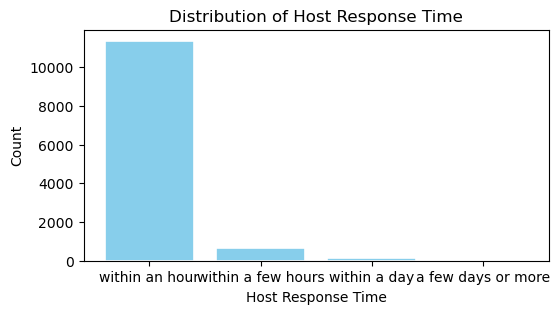

In [5452]:
# Calculate the counts of each category
counts = df_listings['host_response_time'].value_counts()

# Extract categories and counts
categories = counts.index
counts = counts.values

# Configure size (width, height) in inches
plt.figure(figsize=(6,3))  

# Plot data using a bar chart
plt.bar(categories, counts, color='skyblue', edgecolor='white', linewidth=1.2)

# Set figure's labels and title
plt.xlabel('Host Response Time')
plt.ylabel('Count')
plt.title('Distribution of Host Response Time')

In [5453]:
# Frequency
df_listings['host_is_superhost'].value_counts(dropna = False)

host_is_superhost
f    8285
t    3912
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Host is Superhost')

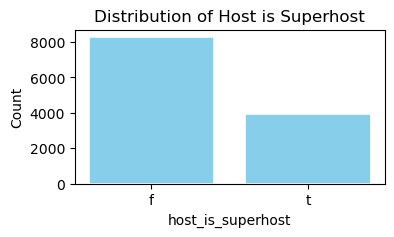

In [5454]:
# Bar chart for 'host_is_superhost'
counts = df_listings['host_is_superhost'].value_counts()
categories = counts.index
counts = counts.values
plt.figure(figsize=(4, 2))
plt.bar(categories, counts, color='skyblue', edgecolor='white', linewidth=1.2)
plt.xlabel('host_is_superhost')
plt.ylabel('Count')
plt.title('Distribution of Host is Superhost')

#### Initial findings: Superhost status does not necessarily translate to higher bookings

In [5455]:
# Frequency
df_listings['host_identity_verified'].value_counts(dropna = False)

host_identity_verified
t    11911
f      286
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Host is Verified')

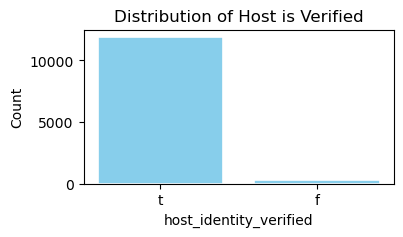

In [5456]:
# Create the bar chart
counts = df_listings['host_identity_verified'].value_counts()
categories = counts.index
counts = counts.values
plt.figure(figsize=(4, 2))  
plt.bar(categories, counts, color='skyblue', edgecolor='white', linewidth=1.2)
plt.xlabel('host_identity_verified')
plt.ylabel('Count')
plt.title('Distribution of Host is Verified')

In [5457]:
# Frequency
df_listings['room_type'].value_counts(dropna = False)

room_type
Entire home/apt    9133
Private room       2538
Shared room         374
Hotel room          152
Name: count, dtype: int64

#### Initial findings: Airbnb is not typically the place to go for booking hotels as indicated by low booking levels for hotel rooms. Moreover, privacy seems to be important to visitors with higher bookings for 'Entire home/apt' and 'private room' bookings, whereas 'shared room' have lower bookings

Text(0.5, 1.0, 'Distribution of Room Type')

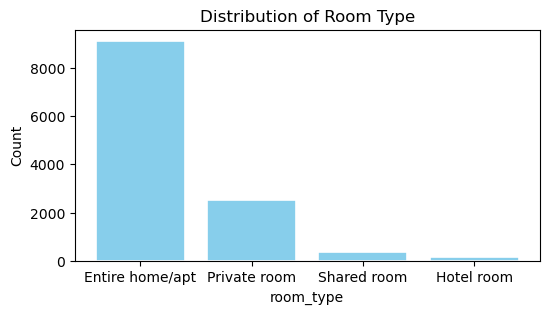

In [5458]:
# Create the bar chart for 'room_type'
counts = df_listings['room_type'].value_counts()
categories = counts.index
counts = counts.values
plt.figure(figsize=(6, 3)) 
plt.bar(categories, counts, color='skyblue', edgecolor='white', linewidth=1.2)
plt.xlabel('room_type')
plt.ylabel('Count')
plt.title('Distribution of Room Type')

In [5459]:
# Frequency
df_listings['instant_bookable'].value_counts(dropna = False)

instant_bookable
t    9107
f    3090
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of whether Listing is Bookable Instantly')

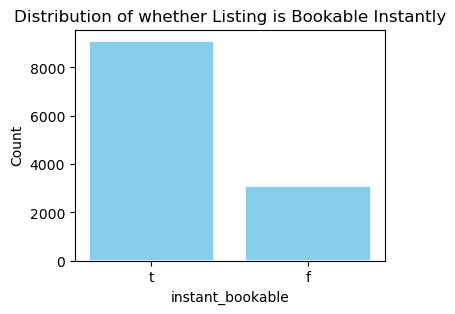

In [5460]:
# Calculate the counts of each category
counts = df_listings['instant_bookable'].value_counts()
categories = counts.index
counts = counts.values
plt.figure(figsize=(4, 3)) 
plt.bar(categories, counts, color='skyblue', edgecolor='white', linewidth=1.2)
plt.xlabel('instant_bookable')
plt.ylabel('Count')
plt.title('Distribution of whether Listing is Bookable Instantly')

### Frequency (for Continuous) to be used for user segmentation, exploring relationship using correlation matrix or heatmap, and potentially for clustering analysis

In [5461]:
df_listings['accommodates'].value_counts(dropna = False)

accommodates
2     3577
4     2156
3     2142
6     1116
5      836
1      754
8      557
7      305
10     287
9      135
12     129
16      61
11      53
13      41
14      33
15      15
Name: count, dtype: int64

#### Initial findings: Most bookings have up to 6 guests

Text(0.5, 1.0, 'Distribution of No of Guests')

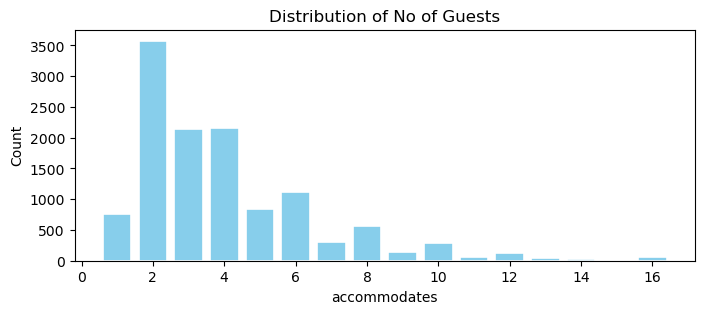

In [5462]:
# Create the bar chart for 'accommodates'
counts = df_listings['accommodates'].value_counts()
categories = counts.index
counts = counts.values
plt.figure(figsize=(8, 3)) 
plt.bar(categories, counts, color='skyblue', edgecolor='white', linewidth=1.2)
plt.xlabel('accommodates')
plt.ylabel('Count')
plt.title('Distribution of No of Guests')

In [5463]:
df_listings['beds'].value_counts(dropna = False)

beds
2.0     4438
1.0     3931
3.0     1481
4.0     1216
5.0      466
6.0      298
8.0      127
7.0      121
10.0      44
9.0       31
12.0      17
11.0      15
16.0       4
20.0       3
13.0       3
15.0       1
19.0       1
Name: count, dtype: int64

#### Initial findings: Listings with up to 4 beds have the highest bookings

Text(0.5, 1.0, 'Distribution of No of Beds')

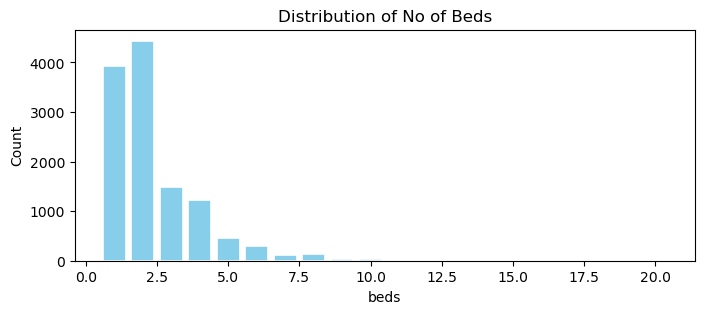

In [5464]:
# Create the bar chart for 'beds'
counts = df_listings['beds'].value_counts()
categories = counts.index
counts = counts.values
plt.figure(figsize=(8, 3))  
plt.bar(categories, counts, color='skyblue', edgecolor='white', linewidth=1.2)
plt.xlabel('beds')
plt.ylabel('Count')
plt.title('Distribution of No of Beds')

Text(0.5, 1.0, 'Histogram of No of Beds')

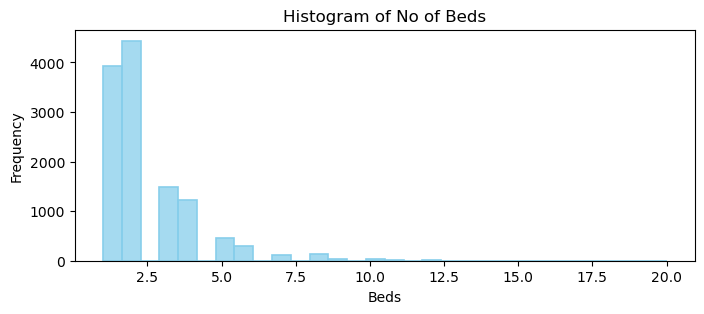

In [5465]:
# Configure size 
plt.figure(figsize=(8, 3)) 

# Create a histogram with seaborn
sns.histplot(df_listings['beds'], bins=30, kde=False, color='skyblue', 
             edgecolor='skyblue', linewidth=1.2)

# Add labels and title
plt.xlabel('Beds')
plt.ylabel('Frequency')
plt.title('Histogram of No of Beds')

In [5466]:
top_20_prices = df_listings['price_usd'].value_counts(dropna=False).head(20)
print(top_20_prices)

price_usd
131.0    427
93.0     141
87.0     128
72.0     128
62.0     121
111.0    117
124.0    115
80.0     110
109.0    106
68.0     101
186.0    101
74.0     101
91.0      98
155.0     98
81.0      97
90.0      96
49.0      96
89.0      92
99.0      87
117.0     85
Name: count, dtype: int64


#### Initial findings: Prices vary greatly and may need to be grouped into more manageable price ranges

Text(0.5, 1.0, 'Histogram of Prices in US dollars')

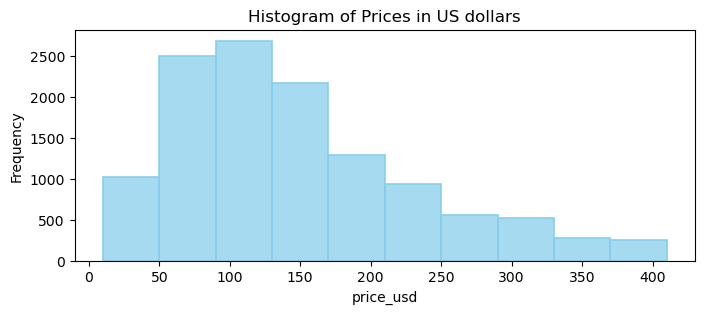

In [5467]:
# Create a histogram with seaborn
plt.figure(figsize=(8, 3)) 
sns.histplot(df_listings['price_usd'], bins=10, kde=False, color='skyblue', 
             edgecolor='skyblue', linewidth=1.2)
plt.xlabel('price_usd')
plt.ylabel('Frequency')
plt.title('Histogram of Prices in US dollars')

In [5468]:
# Define a custom function to describe pricing
def price_label(row):
    if row['price_usd'] < 140:
        return 'Low Price'
    elif (row['price_usd'] >= 140) and (row['price_usd'] <= 280):
        return 'Mid Price'
    elif row['price_usd'] > 280:
        return 'High Price'
    else:
        return 'Not enough data'


In [5469]:
# For the subset defined above, df: Create a new column 'pricing_score' and to apply the custom function 'price_label' to all rows (axis=1)
df_listings['pricing_score'] = df_listings.apply(price_label, axis=1)

In [5470]:
# Use the value_counts() function to count the number of products within each label
df_listings['pricing_score'].value_counts(dropna = False)

pricing_score
Low Price     7070
Mid Price     3979
High Price    1148
Name: count, dtype: int64

In [5471]:
df_listings.shape

(12197, 19)

In [5472]:
df_listings.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood,latitude,longitude,room_type,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price_usd,region,pricing_score
0,197677,964081,within a day,100.0,t,t,Sumida Ku,35.717070,139.826080,Entire home/apt,2,2.0,3,174,4.77,f,74.0,Eastern,Low Price
1,776070,801494,within an hour,100.0,t,t,Kita Ku,35.738440,139.769170,Private room,1,1.0,3,249,4.98,f,53.0,Northern,Low Price
2,905944,4847803,within an hour,97.0,t,t,Shibuya Ku,35.678780,139.678470,Entire home/apt,6,4.0,3,198,4.78,t,172.0,Central,Mid Price
4,3838856,4626879,within an hour,100.0,t,t,Shibuya Ku,35.682450,139.690090,Entire home/apt,7,5.0,1,220,4.89,f,166.0,Central,Mid Price
5,1196177,5686404,within an hour,100.0,f,t,Adachi Ku,35.744731,139.797384,Private room,4,2.0,2,108,4.75,f,37.0,Eastern,Low Price


#### Initial findings: Most travelers seek low to mid price accommodation options

In [5473]:
# How long to most visitors stay, Top 10 only
top_10_minimum_nights = df_listings['minimum_nights'].value_counts(dropna=False).head(10)
print(top_10_minimum_nights)

minimum_nights
1     6411
2     4119
3      991
4      255
5      186
29      64
7       51
28      42
20      21
14      18
Name: count, dtype: int64


#### Initial findings: Visitors generally stay 1 to 3 nights and are the most popular bookings

Text(0.5, 1.0, 'Histogram of Minimum Nights')

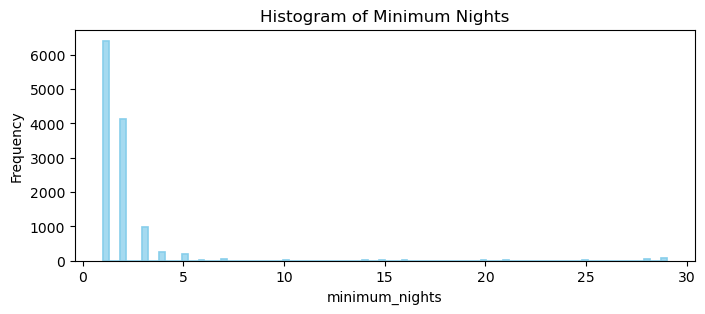

In [5474]:
# Create a histogram with seaborn
plt.figure(figsize=(8, 3))  # Adjust width and height as needed
sns.histplot(df_listings['minimum_nights'], bins=100, kde=False, color='skyblue', 
             edgecolor='skyblue', linewidth=1.2)
plt.xlabel('minimum_nights')
plt.ylabel('Frequency')
plt.title('Histogram of Minimum Nights')

Text(0.5, 1.0, 'Distribution of No of Reviews')

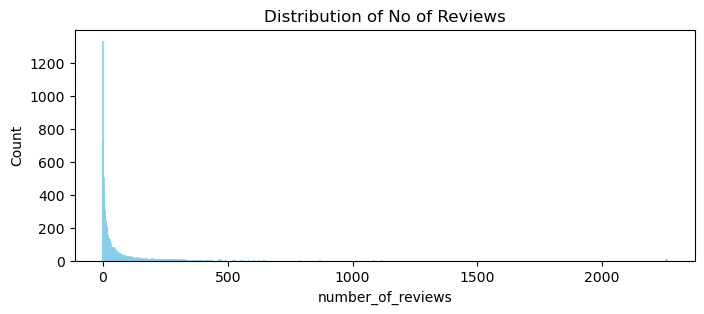

In [5475]:
# Create the bar chart for 'number_of_reviews'
counts = df_listings['number_of_reviews'].value_counts()
categories = counts.index
counts = counts.values
plt.figure(figsize=(8, 3))  
plt.bar(categories, counts, color='skyblue', edgecolor='skyblue', linewidth=1.2)
plt.xlabel('number_of_reviews')
plt.ylabel('Count')
plt.title('Distribution of No of Reviews')

Text(0.5, 1.0, 'Histogram of Number of Reviews')

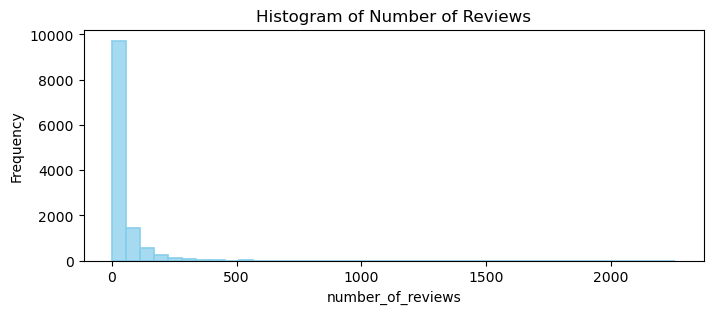

In [5476]:
# Create a histogram with seaborn
plt.figure(figsize=(8, 3))  
sns.histplot(df_listings['number_of_reviews'], bins=40, kde=False, color='skyblue', 
             edgecolor='skyblue', linewidth=1.2)
plt.xlabel('number_of_reviews')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Reviews')

In [5477]:
top_10_review_scores_rating = df_listings['review_scores_rating'].value_counts(dropna = False).head(10)
print(top_10_review_scores_rating)

review_scores_rating
5.000000    1785
4.684181    1329
4.500000     368
4.670000     360
4.750000     308
4.800000     285
4.000000     277
4.830000     243
4.860000     224
4.880000     224
Name: count, dtype: int64


#### Initial findings: Ratings, like prices, vary greatly and will be grouped into 'Low', 'High', or 'Not enough data', using a custom function

Text(0.5, 1.0, 'Histogram of Review Scores Rating')

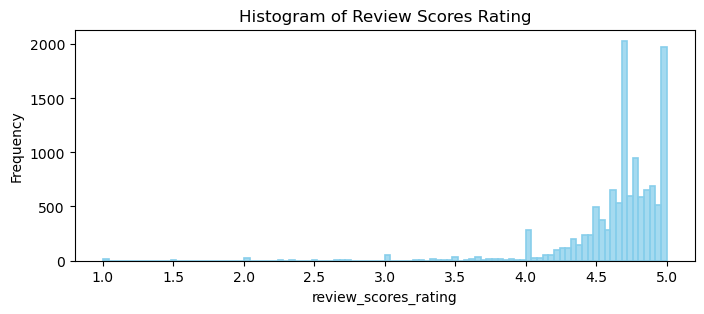

In [5478]:
# Create a histogram with seaborn
plt.figure(figsize=(8, 3)) 
sns.histplot(df_listings['review_scores_rating'], bins=100, kde=False, color='skyblue', 
             edgecolor='skyblue', linewidth=1.2)
plt.xlabel('review_scores_rating')
plt.ylabel('Frequency')
plt.title('Histogram of Review Scores Rating')

In [5479]:
# Define a custom function
def rating_label(row):
    if row['review_scores_rating'] <= 3.99:
        return 'Low Rating'
    elif (row['review_scores_rating'] > 3.99):
        return 'High Rating'
    else: return 'Not enough data'

In [5480]:
# Create a new column 'rating_score' and to apply the custom function 'rating_label' to all rows (axis=1)
df_listings['rating_score'] = df_listings.apply(rating_label, axis=1)

In [5481]:
# Frequency
df_listings['rating_score'].value_counts(dropna = False)

rating_score
High Rating    11915
Low Rating       282
Name: count, dtype: int64

#### Initial findings: Most bookings received 'High Rating' of 4 and up

Text(0.5, 1.0, 'Histogram of Response Rate')

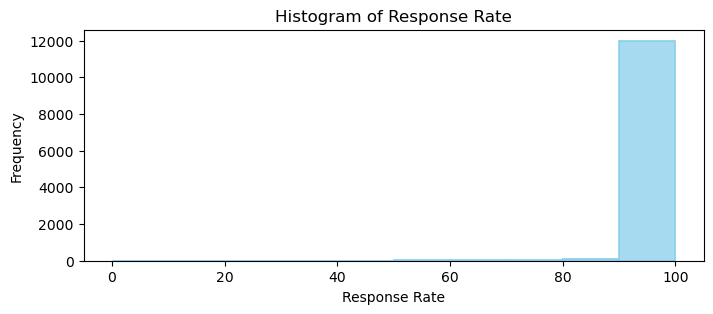

In [5482]:
# Create a histogram with seaborn
plt.figure(figsize=(8, 3)) 
sns.histplot(df_listings['host_response_rate'], bins=10, kde=False, color='skyblue', 
             edgecolor='skyblue', linewidth=1.2)
plt.xlabel('Response Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Response Rate')

In [5483]:
df_listings.describe().round()

,host_response_rate,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,price_usd
count,12197.0,12197.0,12197.0,12197.0,12197.0,12197.0,12197.0,12197.0,12197.0
mean,99.0,36.0,140.0,4.0,2.0,2.0,37.0,5.0,146.0
std,5.0,0.0,0.0,3.0,2.0,3.0,62.0,0.0,85.0
min,0.0,36.0,140.0,1.0,1.0,1.0,0.0,1.0,10.0
25%,100.0,36.0,140.0,2.0,1.0,1.0,4.0,5.0,83.0
50%,100.0,36.0,140.0,3.0,2.0,1.0,15.0,5.0,127.0
75%,100.0,36.0,140.0,5.0,3.0,2.0,46.0,5.0,191.0
max,100.0,36.0,140.0,16.0,20.0,29.0,2258.0,5.0,410.0


In [5484]:
df_listings.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood,latitude,longitude,room_type,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price_usd,region,pricing_score,rating_score
0,197677,964081,within a day,100.0,t,t,Sumida Ku,35.717070,139.826080,Entire home/apt,2,2.0,3,174,4.77,f,74.0,Eastern,Low Price,High Rating
1,776070,801494,within an hour,100.0,t,t,Kita Ku,35.738440,139.769170,Private room,1,1.0,3,249,4.98,f,53.0,Northern,Low Price,High Rating
2,905944,4847803,within an hour,97.0,t,t,Shibuya Ku,35.678780,139.678470,Entire home/apt,6,4.0,3,198,4.78,t,172.0,Central,Mid Price,High Rating
4,3838856,4626879,within an hour,100.0,t,t,Shibuya Ku,35.682450,139.690090,Entire home/apt,7,5.0,1,220,4.89,f,166.0,Central,Mid Price,High Rating
5,1196177,5686404,within an hour,100.0,f,t,Adachi Ku,35.744731,139.797384,Private room,4,2.0,2,108,4.75,f,37.0,Eastern,Low Price,High Rating


In [5485]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12197 entries, 0 to 13724
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      12197 non-null  object 
 1   host_id                 12197 non-null  object 
 2   host_response_time      12197 non-null  object 
 3   host_response_rate      12197 non-null  float64
 4   host_is_superhost       12197 non-null  object 
 5   host_identity_verified  12197 non-null  object 
 6   neighbourhood           12197 non-null  object 
 7   latitude                12197 non-null  float64
 8   longitude               12197 non-null  float64
 9   room_type               12197 non-null  object 
 10  accommodates            12197 non-null  int64  
 11  beds                    12197 non-null  float64
 12  minimum_nights          12197 non-null  int64  
 13  number_of_reviews       12197 non-null  int64  
 14  review_scores_rating    12197 non-null  flo

#### df_listings 10 numerical columns

In [5486]:
df_listings.describe().round()

,host_response_rate,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,price_usd
count,12197.0,12197.0,12197.0,12197.0,12197.0,12197.0,12197.0,12197.0,12197.0
mean,99.0,36.0,140.0,4.0,2.0,2.0,37.0,5.0,146.0
std,5.0,0.0,0.0,3.0,2.0,3.0,62.0,0.0,85.0
min,0.0,36.0,140.0,1.0,1.0,1.0,0.0,1.0,10.0
25%,100.0,36.0,140.0,2.0,1.0,1.0,4.0,5.0,83.0
50%,100.0,36.0,140.0,3.0,2.0,1.0,15.0,5.0,127.0
75%,100.0,36.0,140.0,5.0,3.0,2.0,46.0,5.0,191.0
max,100.0,36.0,140.0,16.0,20.0,29.0,2258.0,5.0,410.0


In [5487]:
df_listings.shape

(12197, 20)

## 4. Export Data Frame as Pkl

In [5488]:
# Export df_listings dataframe as “listings_clean.pkl” under “Prepared Data” folder.
df_listings.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'listings_clean.pkl'))

## 5. Export Data Frame as CSV

In [5489]:
# Export df_dep_t_new dataframe as “departments_wrangled.csv” in your “Prepared Data” folder
df_listings.to_csv(os.path.join(path, '02 Data','Prepared Data', 'listings_clean.csv'))